In [1]:
import cv2
import numpy as np

In [2]:
image = cv2.imread('lenna.png')

kernal = np.ones((2,2),np.float32) / 4

smoothed_image = cv2.filter2D(image,-1,kernal)

cv2.imshow('Original',image)
cv2.imshow('Smoothed',smoothed_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
kernal

array([[0.25, 0.25],
       [0.25, 0.25]], dtype=float32)

### Gaussian kernal

In [4]:
kernal_size = 9
sigma = 0.35 * ((kernal_size - 1) * 0.5 - 1) + 0.9
kernal = cv2.getGaussianKernel(kernal_size,sigma)

In [5]:
kernal

array([[0.02545567],
       [0.06390422],
       [0.12332802],
       [0.1829705 ],
       [0.20868321],
       [0.1829705 ],
       [0.12332802],
       [0.06390422],
       [0.02545567]])

In [6]:
gray = cv2.imread('lenna.png',0)

In [7]:
gray.shape

(512, 512)

In [8]:
blurred = cv2.filter2D(gray,-1,kernal)

In [9]:
import matplotlib.pyplot as plt

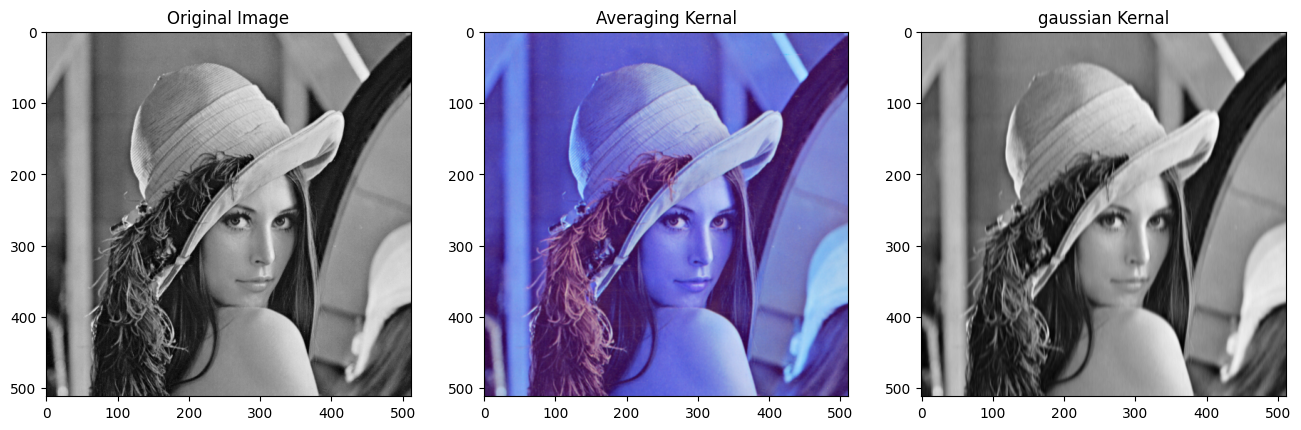

In [10]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(gray,cmap='gray')
plt.subplot(1,3,2)
plt.title('Averaging Kernal')
plt.imshow(smoothed_image,cmap='gray')
plt.subplot(1,3,3)
plt.title('gaussian Kernal')
plt.imshow(blurred,cmap='gray')


In [11]:
gray

array([[169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       [169, 169, 168, ..., 175, 162, 138],
       ...,
       [ 53,  53,  59, ..., 115, 112, 114],
       [ 53,  53,  64, ..., 117, 118, 122],
       [ 53,  53,  64, ..., 117, 118, 122]], dtype=uint8)

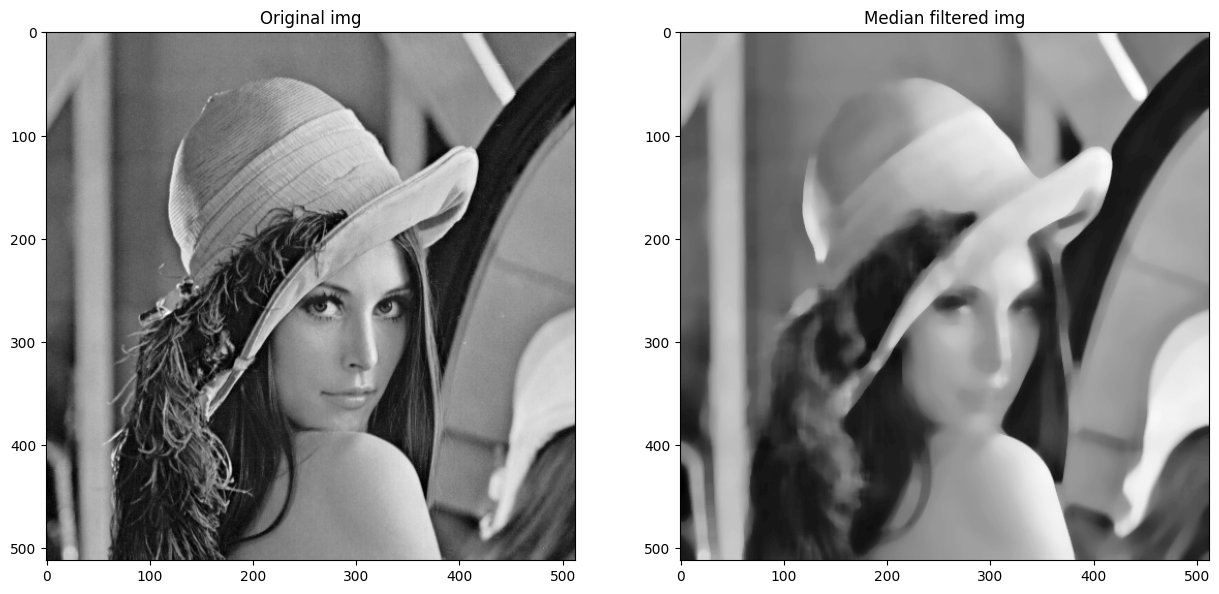

In [12]:
kernal_size = 15
median = cv2.medianBlur(gray,kernal_size)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1),plt.imshow(gray,cmap = 'gray'),plt.title('Original img')
plt.subplot(1,2,2),plt.imshow(median,cmap = 'gray'),plt.title('Median filtered img')
plt.show()

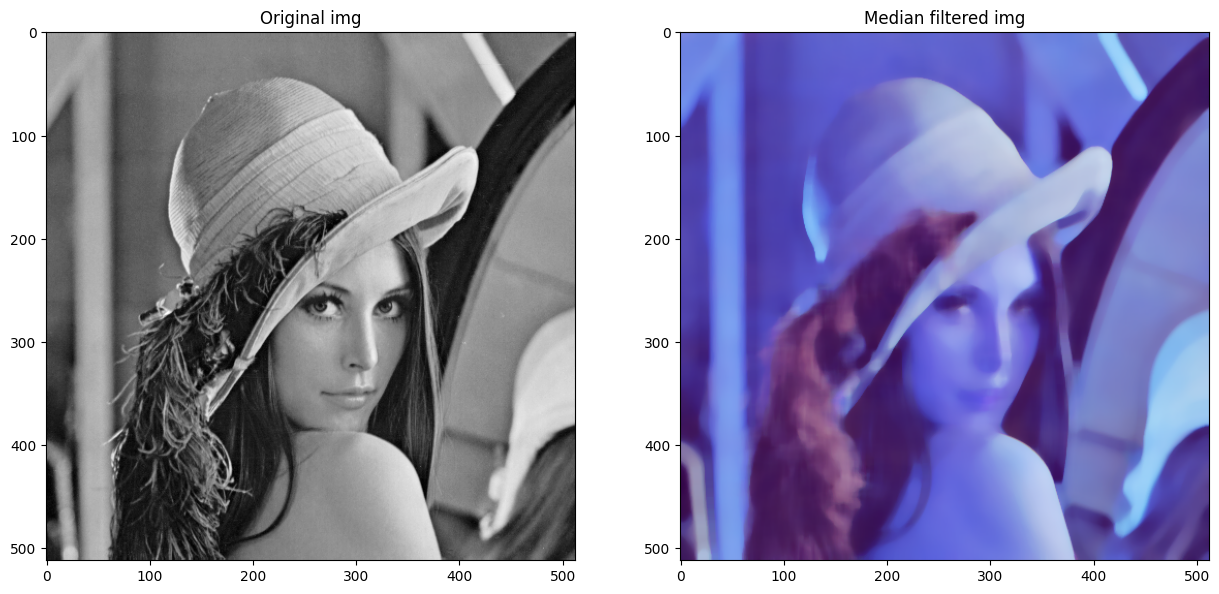

In [13]:
kernal_size = 15
median = cv2.medianBlur(image,kernal_size)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1),plt.imshow(gray,cmap = 'gray'),plt.title('Original img')
plt.subplot(1,2,2),plt.imshow(median,cmap = 'gray'),plt.title('Median filtered img')
plt.show()

In [22]:
kernal_size = 11
median = cv2.medianBlur(image,kernal_size)
plt.figure(figsize=(15,10))

new_img = np.hstack([image,median])

cv2.imshow('Final',new_img)
new_img = cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imsave('image.png',new_img)

<Figure size 1500x1000 with 0 Axes>

###  Bilateral Filter

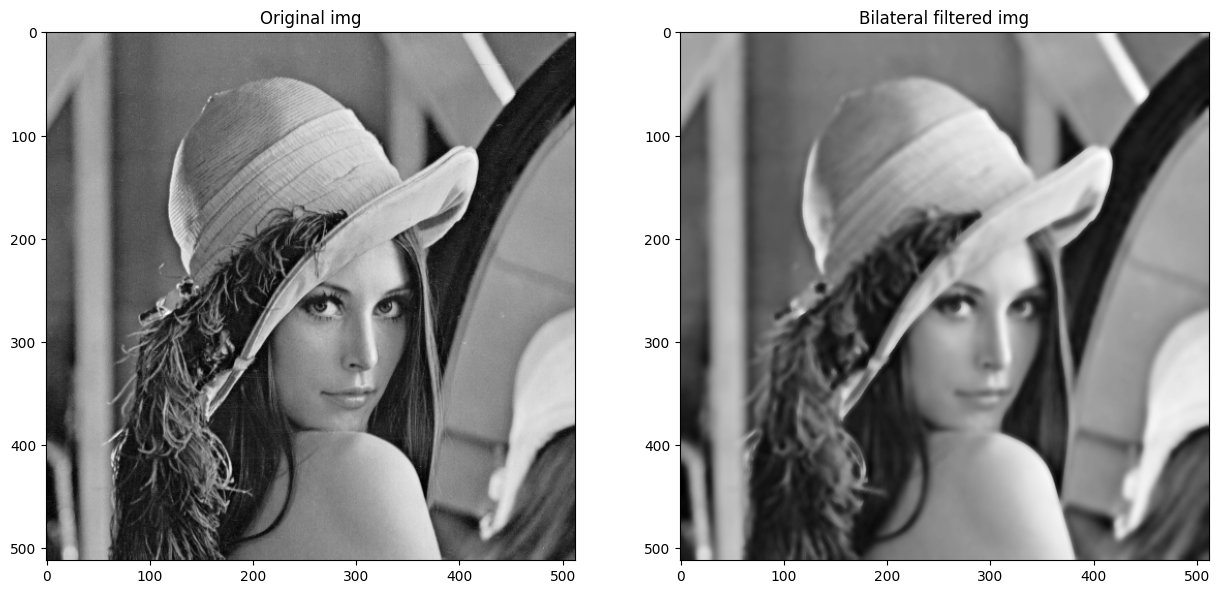

In [26]:
import cv2
import numpy as np

img = cv2.imread('lenna.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

bilateral = cv2.bilateralFilter(gray,d = 9,sigmaColor = 95,sigmaSpace = 75)

plt.figure(figsize=(15,10))
plt.subplot(1,2,1),plt.imshow(gray,cmap = 'gray'),plt.title('Original img')
plt.subplot(1,2,2),plt.imshow(bilateral,cmap = 'gray'),plt.title('Bilateral filtered img')
plt.show()

In [40]:
import cv2
import numpy as np

kernal = cv2.getGaussianKernel(kernal_size,sigma)

img = cv2.imread('lenna.png')
bilateral = cv2.bilateralFilter(img,d = 9,sigmaColor = 95,sigmaSpace = 75)
median = cv2.medianBlur(img,kernal_size)
gaussian = cv2.filter2D(img,15,kernal)

new_img1= np.hstack([img,gaussian])
new_img2 = np.hstack([median,bilateral])
new = np.vstack(new_img1,new_img2)

cv2.imshow('Final',new)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imsave('image.png',new)

error: OpenCV(4.9.0) D:/a/opencv-python/opencv-python/opencv/modules/imgproc/src/filter.simd.hpp:3296: error: (-213:The function/feature is not implemented) Unsupported combination of source format (=16), and destination format (=23) in function 'cv::opt_AVX2::getLinearFilter'
